In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 100)

In [ ]:
df = pd.read_pickle("Вставьте сюда название файла/путь до файла")


In [ ]:
df.head(5)

,ecg_id,patient_id,age,sex,height,weight,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,second_opinion,initial_autogenerated_report,validated_by_human,extra_beats,pacemaker,strat_fold,diagnostic_superclass,ecg_signals
1,2,13243.0,19.0,0,NaN,70.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,"{'NORM': 80.0, 'SBRAD': 0.0}",NaN,NaN,NaN,False,False,True,NaN,NaN,2,[NORM],"[[-0.015, 0.12, 0.135, -0.053, -0.075, 0.127, ..."
2,3,20372.0,37.0,1,NaN,69.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,False,False,True,NaN,NaN,5,[NORM],"[[-0.035, -0.07, -0.035, 0.053, 0.0, -0.052, 0..."
6,7,16193.0,54.0,0,NaN,83.0,CS-12 E,1984-11-28 13:32:22,"sinusrhythmus linkstyp t abnormal, wahrscheinl...","{'NORM': 100.0, 'SR': 0.0}",LAD,NaN,NaN,False,False,True,NaN,NaN,7,[NORM],"[[-0.09, -0.02, 0.07, 0.055, -0.08, 0.025, 0.0..."
9,10,9456.0,22.0,1,NaN,56.0,CS-12 E,1984-12-12 14:12:46,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,False,False,True,NaN,NaN,9,[NORM],"[[-0.065, -0.12, -0.055, 0.093, -0.005, -0.087..."
11,12,11031.0,43.0,1,NaN,44.0,CS-12 E,1984-12-21 08:02:26,sinusbradykardie sonst normales ekg,"{'NORM': 80.0, 'SBRAD': 0.0}",NaN,NaN,NaN,False,False,True,NaN,NaN,8,[NORM],"[[0.265, 0.35, 0.085, -0.308, 0.09, 0.217, -0...."


### Подробное описание столбцов

| **Колонка** | **Тип** | **Описание** | **Комментарий** |
|--------------|----------|---------------|-------------------------------|
| **ecg_id** | `int` *(index)* | Уникальный идентификатор записи. Каждая запись — один 10-секундный сигнал. |  Использовать как идентификатор |
| **patient_id** | `float` | Уникальный идентификатор пациента. У одного пациента может быть несколько ЭКГ. |  Важно для группировки и корректного разделения train/test |
| **age** | `float` | Возраст пациента на момент записи (в годах). | Полезно как фича |
| **sex** | `int` | Пол пациента: `1` — мужчина, `0` — женщина. | Полезно как фича |
| **height** | `float` | Рост пациента (см). Может содержать пропуски. | Полезно как фича, но часто отсутствует |
| **weight** | `float` | Вес пациента (кг). Может содержать пропуски. | Полезно как фича, но часто отсутствует |
| **device** | `str` | Название прибора, например `CS-12 E` — модель Schiller. | Техническое поле, скорее всего не будем использовать |
| **recording_date** | `datetime` | Дата и время записи ЭКГ. | Можно использовать для анализа по времени |
| **report** | `str` | Текстовый отчёт (врачебный или автоматический, часто на немецком). | это возможно gt leak?|
| **scp_codes** | `dict` | Словарь кодов SCP и вероятностей, например `{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}`. | Ключевая колонка — содержит диагнозы |но скорее всего таргетной будет колонка с суперклассом диагноза
| **heart_axis** | `float` | Электрическая ось сердца (в градусах). | Полезно как фича |
| **infarction_stadium1** | `str` | Стадия инфаркта (если применимо). | скорее всего gt leak
| **infarction_stadium2** | `str` | Альтернативная стадия инфаркта (вторая аннотация). | скорее всего gt leak
| **extra_beats** | `float / str` | Наличие экстрасистол (дополнительных ударов). |  Полезно как фича | gt leak?
| **pacemaker** | `bool` | Наличие активного кардиостимулятора. | Полезно как фича | gt leak?
| **strat_fold** | `int (1–10)` | Номер фолда для стратифицированной кросс-валидации. Все записи одного пациента в одном фолде. |  Использовать для train/val/test разделения |
| **diagnostic_superclass** | `list` | Итоговые агрегированные классы диагнозов (например `['NORM']`, `['MI','STTC']`). | Основная целевая переменная (label) |
| **ecg_signals** | `list` |экг сигналы частотой 500 гц | Основная фича

Описание диагнозов из таргетной колонки **ecg_signals**
| Code | Name | Description |
|------|------|-------------|
| **NORM** | Normal ECG | Normal electrocardiogram. |
| **MI** | Myocardial Infarction | A heart attack caused by reduced or blocked blood flow to part of the heart, leading to damage of heart muscle. |
| **STTC** | ST/T Change | ST-segment and T-wave changes that may indicate cardiac pathology or be a normal variant; interpretation depends on clinical context and prior ECGs. |
| **CD** | Conduction Disturbance | Abnormal electrical conduction in the heart that may cause arrhythmias or irregular heartbeats. |
| **HYP** | Hypertrophy | Thickening of the heart muscle (hypertrophic cardiomyopathy), which can reduce the heart’s ability to pump blood. |


In [ ]:
print("ОСНОВНАЯ ИНФОРМАЦИЯ")
print(f"Размер датасета: {df.shape}")
print(f"Количество строк: {df.shape[0]:,}")
print(f"Количество столбцов: {df.shape[1]}")

ОСНОВНАЯ ИНФОРМАЦИЯ
Размер датасета: (12766, 21)
Количество строк: 12,766
Количество столбцов: 21


In [ ]:
print("\nТИПЫ ДАННЫХ")
print(df.dtypes)


ТИПЫ ДАННЫХ
ecg_id                            int64
patient_id                      float64
age                             float64
sex                               int64
height                          float64
weight                          float64
device                           object
recording_date                   object
report                           object
scp_codes                        object
heart_axis                       object
infarction_stadium1              object
infarction_stadium2              object
second_opinion                     bool
initial_autogenerated_report       bool
validated_by_human                 bool
extra_beats                      object
pacemaker                        object
strat_fold                        int64
diagnostic_superclass            object
ecg_signals                      object
dtype: object


## Анализируем признаки и работаем с пропусками

In [ ]:
print("АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")

nan_stats = (
    df.isna()
      .sum()
      .to_frame("количество пропусков")
      .assign(
          количество_пропусков_в_процентах=lambda x: x["количество пропусков"] / len(df) * 100
      )
      .sort_values("количество_пропусков_в_процентах", ascending=False)
      .round(2)
)
nan_stats

АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ


,количество пропусков,количество_пропусков_в_процентах
infarction_stadium2,12711,99.57
pacemaker,12695,99.44
extra_beats,11888,93.12
infarction_stadium1,10014,78.44
heart_axis,6994,54.79
height,6388,50.04
weight,5032,39.42
diagnostic_superclass,0,0.00
strat_fold,0,0.00
validated_by_human,0,0.00


**Вывод по пропускам:**
- Критические пропуски (>75%): `pacemaker`, `extra_beats` ,`infarction_stadium1` , `infarction_stadium2`
- Исключаем признаки, в которых пропущена большая часть данных (>75%), так как они статистически не значимы, их нельзя заполнить валидными значениями



In [ ]:
df = df.drop(["pacemaker", "extra_beats", "infarction_stadium1", "infarction_stadium2"], axis=1)

Заполним Nan-значения в колонках 'height' и 'weight' рандомными значениями от 10 до 90 процентилями отдельно для каждой из групп - мужчины и женщины:

In [ ]:
def fill_rand_based_q(df, cols=["height", "weight"], group="sex"):
    df = df.copy()
    np.random.seed(42)
    for col in cols:

        q = df.groupby(group)[col].quantile([0.1, 0.9]).unstack()


        for s in q.index:
            low, high = q.loc[s, 0.1], q.loc[s, 0.9]
            mask = (df[group] == s) & (df[col].isna())

            if pd.isna(low) or pd.isna(high) or low == high:
                continue

            df.loc[mask, col] = np.random.uniform(low, high, mask.sum())

    return df

df = fill_rand_based_q(df)


Колонка **heart_axis** содержит категории вида :array[nan, 'LAD', 'ALAD', 'AXR', 'MID', 'ARAD', 'AXL', 'RAD', 'SAG'], заполним Nan категорией - **NO_DATA**

In [ ]:

df["heart_axis"] = df.heart_axis.fillna("NO_DATA")

In [ ]:
df.heart_axis

1        NO_DATA
2        NO_DATA
6            LAD
9        NO_DATA
11       NO_DATA
          ...   
21791        MID
21792        MID
21793        LAD
21795        MID
21797        LAD
Name: heart_axis, Length: 12766, dtype: object

In [ ]:
df.isna().sum()

ecg_id                          0
patient_id                      0
age                             0
sex                             0
height                          0
weight                          0
device                          0
recording_date                  0
report                          0
scp_codes                       0
heart_axis                      0
second_opinion                  0
initial_autogenerated_report    0
validated_by_human              0
strat_fold                      0
diagnostic_superclass           0
ecg_signals                     0
dtype: int64

## Посмотрим на статистику для категориальных и вещественных признаков

Вещественные признаки

In [ ]:
df[["weight", "height", "age"]].describe()



,weight,height,age
count,12766.000000,12766.000000,12766.000000
mean,71.521589,166.887527,64.841532
std,14.193004,9.521958,35.496607
min,5.000000,6.000000,3.000000
25%,62.000000,160.000000,50.000000
50%,70.401560,166.627923,64.000000
75%,80.000000,173.857698,75.000000
max,250.000000,209.000000,300.000000


Построим бокс-плоты по вещественным признакам

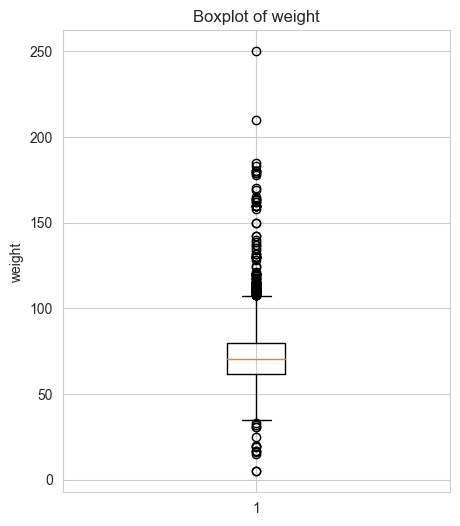

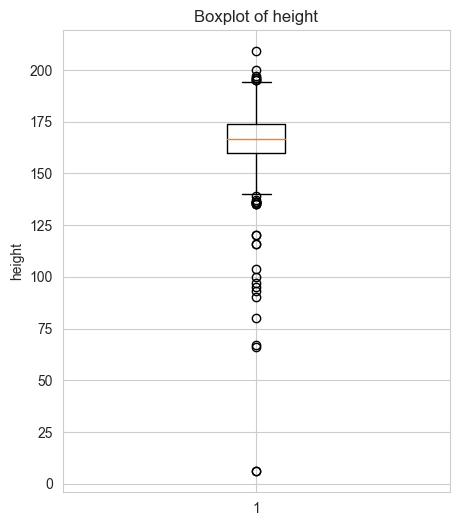

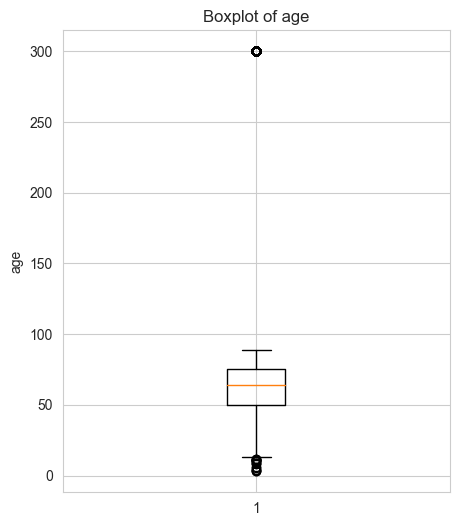

In [ ]:
for col in ["weight", "height", "age"]:
    plt.figure(figsize=(5, 6))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

Категориальные признаки

In [ ]:

df.loc[:, ~df.columns.isin(["ecg_signals", "age", "height", "weight", ])].describe(include='all')

,ecg_id,patient_id,sex,device,recording_date,report,scp_codes,heart_axis,second_opinion,initial_autogenerated_report,validated_by_human,strat_fold,diagnostic_superclass
count,12766.000000,12766.000000,12766.000000,12766,12766,12766,12766,12766,12766,12766,12766,12766.000000,12766
unique,NaN,NaN,NaN,11,12765,6419,3676,9,2,2,1,NaN,28
top,NaN,NaN,NaN,AT-6 C 5.5,1994-02-26 11:09:57,sinus rhythm. normal ecg.,"{'NORM': 100.0, 'SR': 0.0}",NO_DATA,False,False,True,NaN,[NORM]
freq,NaN,NaN,NaN,3623,2,1642,4009,6994,12303,11967,12766,NaN,5927
mean,9658.510653,9258.322497,0.530002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.802131,NaN
std,6084.001752,6379.877452,0.499119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.960455,NaN
min,2.000000,302.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,4055.250000,3796.250000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
50%,9431.500000,7688.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,14726.500000,14720.750000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN


**Вывод:**

- Медиана и среднее значение близки друг к другу, что говорит об отсутствии значимых выбросов в распределении.

- В колонках `height` и `weight` есть аномальные минимальные значения.

- В признаке `age` присутствуют значения 300, что вполне ожидаемо.
Согласно описанию датасета, пациенты старше 89 лет получают возрастное значение 300 для соблюдения стандартов де-идентификации (HIPAA).
Стандарты HIPAA (американский закон о защите медицинских данных) требуют скрывать точный возраст пациентов старше 89 лет, поскольку эта группа мала и может быть уникально идентифицирована.  Чтобы обеспечить анонимность, таким пациентам присваивают условные значения (например, 300+) вместо реального возраста.

Заменим возраст участников старше 89 лет на более реалистичный, чтобы в дальнейшем более правильным образом оценить распределение возраста

In [ ]:

df['age'] = df['age'].replace(300, 98)

Исключим строки с ростом пациентов < 90

In [ ]:

df = df[df["height"] >= 90]
df.shape


(12761, 17)

Исключим строки с весом пациентов < 25

In [ ]:

df = df[df["weight"] > 25]
df.shape

(12751, 17)

## Посмотрим на распределение вещественных признаков

In [ ]:
num_cols = ["age", "height", "weight"]
cat_cols = ["sex", "device", "report", "scp_codes",
               "heart_axis", "initial_autogenerated_report",
                 "validated_by_human",
                 "diagnostic_superclass", "strat_fold"]

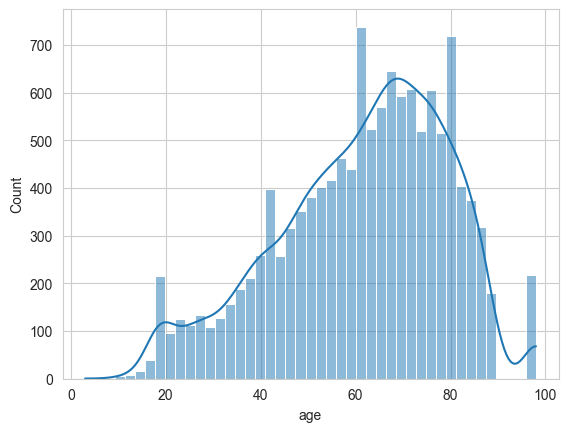

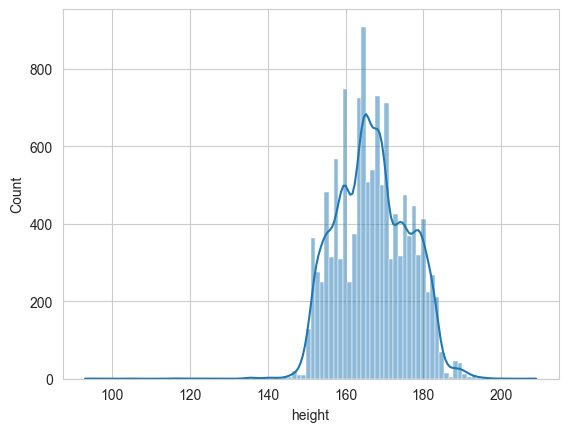

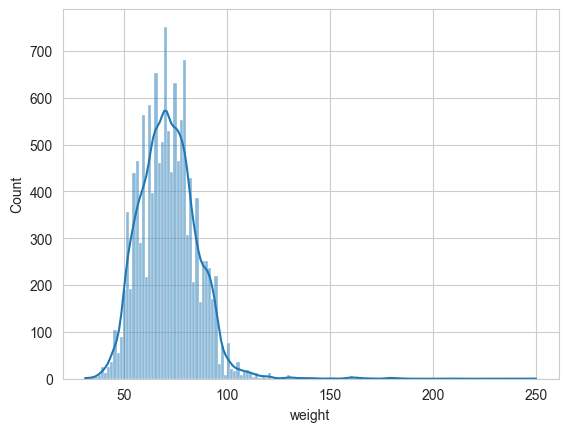

In [ ]:
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.show()

**Вывод:**

**age**

• Наблюдается правостороннее смещение распределения

• Наибольшая концентрация значений наблюдается в диапазоне 60-75 лет  

**height**

• Распределение близко к нормальному

• Выбросы присутствуют, но их количество невелико

• Основные значения находятся в диапазоне 150-185 см

**weight**

• Основной диапазон значений: 50-100 кг  

• Выбросы присутствуют, но их количество невелико



Посмотрим на новую размерность датасета

Поскольку большинство категориальных фич содержат большое количество уникальных значений,
строить графики нецелесообразно.Поэтому ограничимся выводом value_counts для оценки распределения.

In [ ]:
for col in cat_cols:
    print(f"-------{col.upper()}-----\n{df[col].value_counts()}\n")

-------SEX-----
1    6756
0    5995
Name: sex, dtype: int64

-------DEVICE-----
AT-6 C 5.5    3617
CS-12         3163
AT-6     6    2070
CS-12   E     1671
AT-6 C 5.8     740
AT-60    3     722
AT-6 C         324
CS100    3     273
AT-6 C 5.3      62
AT-6 C 5.0      55
AT-6 C 5.6      54
Name: device, dtype: int64

-------REPORT-----
sinus rhythm. normal ecg.                                                                                                                                                                                                                                          1639
sinusrhythmus lagetyp normal normales ekg                                                                                                                                                                                                                           871
sinusrhythmus normales ekg                                                                                                              

Уберем строки с дефектным классом "[]" в колонке diagnostic_superclass

In [ ]:
df = df[df["diagnostic_superclass"].apply(lambda x: len(x) > 0)]

## One-Hot кодировка таргетной переменной и ее исследование

In [ ]:
unique_diagnostic_superclasses = sorted({lbl for row in df["diagnostic_superclass"] for lbl in row})
unique_diagnostic_superclasses

['CD', 'HYP', 'MI', 'NORM', 'STTC']

In [ ]:
for lbl in unique_diagnostic_superclasses:
    df[f"{lbl}"] = df["diagnostic_superclass"].apply(lambda x: int(lbl in x))


In [ ]:
df[["diagnostic_superclass", "CD", "HYP", "MI", "NORM", "STTC"]].head(10)

,diagnostic_superclass,CD,HYP,MI,NORM,STTC
1,[NORM],0,0,0,1,0
2,[NORM],0,0,0,1,0
6,[NORM],0,0,0,1,0
9,[NORM],0,0,0,1,0
11,[NORM],0,0,0,1,0
13,[NORM],0,0,0,1,0
18,[NORM],0,0,0,1,0
20,[NORM],0,0,0,1,0
21,[STTC],0,0,0,0,1
23,[NORM],0,0,0,1,0


**Посмотрим на распределение таргетной переменной**

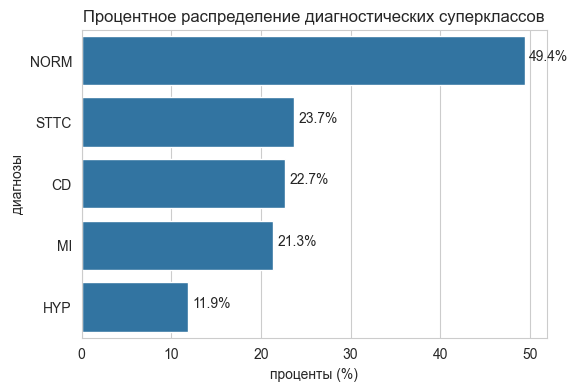

In [ ]:

superclass_cols = ["NORM", "MI", "STTC", "HYP", "CD"]
percent = (df[superclass_cols].sum() / len(df) * 100).sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(6,4))

sns.barplot(
    x=percent.values,
    y=percent.index,
    orient='h'
)

for value, label in zip(percent.values, percent.index):
    plt.text(value + 0.5, label, f"{value:.1f}%")

plt.title("Процентное распределение диагностических суперклассов")
plt.xlabel("проценты (%)")
plt.ylabel("диагнозы")
plt.show()

### Распределение диагностических суперклассов по полу

C:\Users\vasav\AppData\Local\Temp\ipykernel_37408\895327793.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


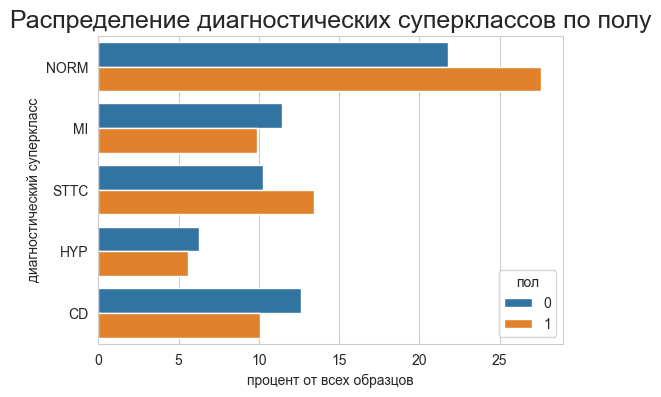

In [ ]:
superclass_cols = ["NORM", "MI", "STTC", "HYP", "CD"]

title = title = "Распределение диагностических суперклассов по полу"

rows = []
total_n = len(df)
for sex, sub in df.groupby("sex"):
    counts = sub[superclass_cols].sum()
    for cls, n in counts.items():
        rows.append({
            "диагностический суперкласс": cls,
            "процент от всех образцов": n / total_n * 100.0,
            "пол": sex
        })

plot_df = pd.DataFrame(rows)
plot_df["диагностический суперкласс"] = pd.Categorical(
    plot_df["диагностический суперкласс"], categories=superclass_cols, ordered=True
)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title(title, fontsize=18)

ax = sns.barplot(
    data=plot_df,
    x="процент от всех образцов",
    y="диагностический суперкласс",
    hue="пол",
    orient="h",
    ci=None
)

  Всего в датасете: 52% — мужчины, 48% — женщины

**NORM (норма)** чаще встречается у **мужчин**.  
  Возможное это связано с тем, что в выборке мужчин немного больше, однако разница в доле NORM превышает разницу в размерах групп, что может указывать на реальную тенденцию.
  
**Вывод:**
В целом у женщин наблюдается более высокая доля патологий ЭКГ (MI, HYP и CD),  
тогда как у мужчин чаще регистрируется норма и незначительно чаще — изменения STTC


## Корреляция между вещественными признаками

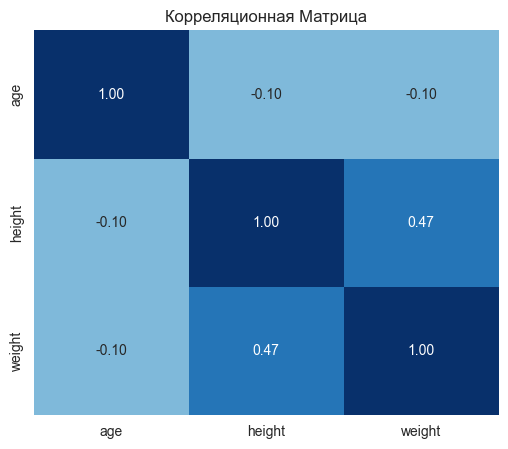

In [ ]:
numeric_df = df[["age", "height", "weight"]]

corr = numeric_df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=-1,
    vmax=1,
    cbar=False
)
plt.title("Корреляционная Матрица")
plt.show()

**Интерпретация результатов корреляции**

**age – height = −0.13** ---> Слабая обратная линейная связь.  

**age – weight = −0.15** ---> Слабая обратная линейная связь.  

**height – weight = 0.56** ---> Средняя положительная связь. Чем выше человек, тем в среднем выше его вес (логично).

**Вывод:**
Ни одна пара признаков не превышает порог |corr| > 0.95.  
Следовательно, вещественных признаков, которые следует удалить из-за высокой взаимной корреляции, нет.  
Все признаки являются информативными и не избыточными.


## Нарисуем для примера экг для 1 строки для 12 отведений

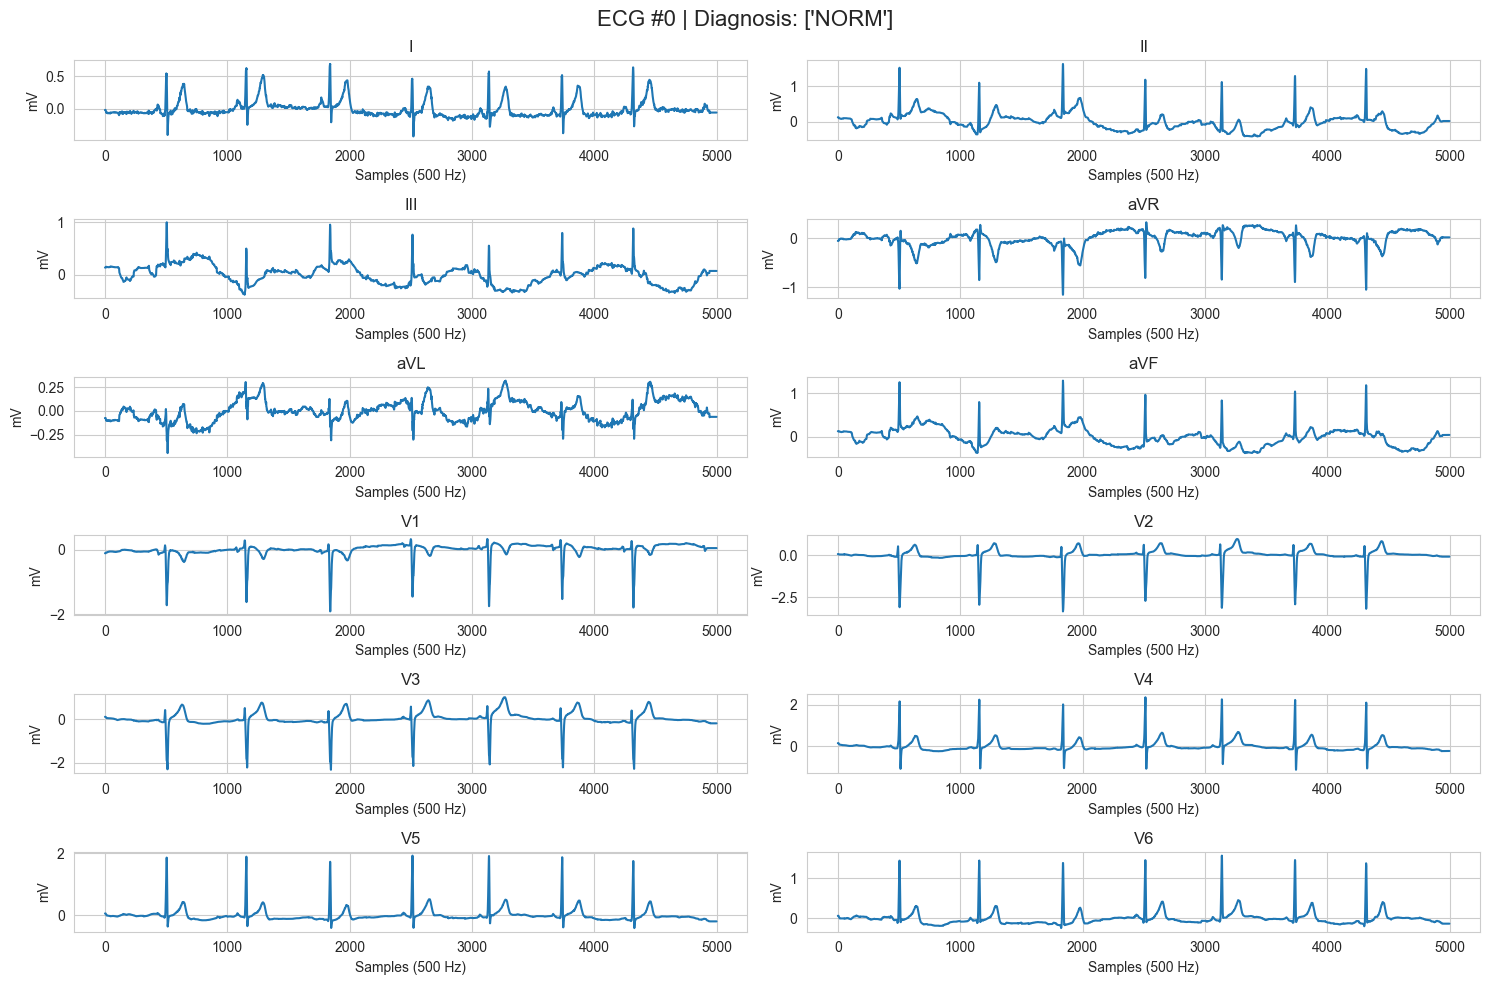

In [ ]:
lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF',
              'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

i = 0  # индекс строки
sig = df["ecg_signals"].iloc[i]
label = df["diagnostic_superclass"].iloc[i]

plt.figure(figsize=(15, 10))
for j in range(12):
    plt.subplot(6, 2, j + 1)
    plt.plot(sig[:, j])
    plt.title(lead_names[j])
    plt.xlabel("Samples (500 Hz)")
    plt.ylabel("mV")
plt.suptitle(f"ECG #{i} | Diagnosis: {label}", fontsize=16)
plt.tight_layout()
plt.show()

## Финальный вывод
Для дальнейшего обучения из исходного датасета отбираем следующие колонки:



**Идентификаторы** - будут использоваться как служебные колонки, не участвуют в обучении модели.
- ecg_id
- patient_id
- recording_date




**Признаки** - будут использоваться как входные признаки модели.
- age
- sex
- height
- weight
- heart_axis
- ecg_signals




**Колонки с фолдами** - будут использоваться для разбиения на train / test.
- strat_fold




**Целевые переменные**
- diagnostic_superclass -- не используем для обучения, но оставим для уточнения диагнозов
- CD
- HYP
- MI
- NORM
- STTC


**Столбцы, которые исключили:**
1. По количеству пропущенных значений: `pacemaker`, `extra_beats` ,`infarction_stadium1` , `infarction_stadium2`

2. По логике:

- `infarction_stadium1`, `infarction_stadium2`, `initial_autogenerated_report`, `scp_codes`, `report` содержат информацию, напрямую связанную с диагнозом пациента. Использование этих колонок в модели может привести к утечке истинной разметки (ground truth) и искусственному завышению метрик. Именно по этим причинам данные признаки исключены из обучения.
- `validated_by_human`, `second_opinion` удаляются как в силу сильного дисбаланса, так и в силу того, что может случиться утечка таргета из-за того, что модель будет обучаться на мнении экспертов, а не показателей


**Посмотрим итоговый датасет:**

In [ ]:
df_to_train_models = df[["ecg_id", "patient_id", "recording_date", "age", "sex", "height", "weight",
    "heart_axis", "ecg_signals", "CD", "HYP", "MI", "NORM",
      "STTC", "diagnostic_superclass", "strat_fold"]]
df_to_train_models


,ecg_id,patient_id,recording_date,age,sex,height,weight,heart_axis,ecg_signals,CD,HYP,MI,NORM,STTC,diagnostic_superclass,strat_fold
1,2,13243.0,1984-11-14 12:55:37,19.0,0,171.116262,70.000000,NO_DATA,"[[-0.015, 0.12, 0.135, -0.053, -0.075, 0.127, ...",0,0,0,1,0,[NORM],2
2,3,20372.0,1984-11-15 12:49:10,37.0,1,167.893889,69.000000,NO_DATA,"[[-0.035, -0.07, -0.035, 0.053, 0.0, -0.052, 0...",0,0,0,1,0,[NORM],5
6,7,16193.0,1984-11-28 13:32:22,54.0,0,182.063572,83.000000,LAD,"[[-0.09, -0.02, 0.07, 0.055, -0.08, 0.025, 0.0...",0,0,0,1,0,[NORM],7
9,10,9456.0,1984-12-12 14:12:46,22.0,1,155.647387,56.000000,NO_DATA,"[[-0.065, -0.12, -0.055, 0.093, -0.005, -0.087...",0,0,0,1,0,[NORM],9
11,12,11031.0,1984-12-21 08:02:26,43.0,1,162.576546,44.000000,NO_DATA,"[[0.265, 0.35, 0.085, -0.308, 0.09, 0.217, -0....",0,0,0,1,0,[NORM],8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21791,21830,10520.0,2001-05-28 07:53:21,86.0,0,166.941744,86.053314,MID,"[[-0.09, 0.05, 0.14, 0.02, -0.115, 0.095, -0.1...",0,0,0,1,0,[NORM],1
21792,21831,11905.0,2001-05-28 12:49:25,55.0,1,162.030533,74.251460,MID,"[[-0.06, -0.065, -0.005, 0.063, -0.027, -0.035...",0,0,0,1,0,[NORM],9
21793,21832,7954.0,2001-05-30 14:14:25,63.0,0,181.949989,79.369158,LAD,"[[-0.07, -0.03, 0.04, 0.05, -0.055, 0.005, 0.1...",1,0,0,0,0,[CD],7
21795,21834,20703.0,2001-06-05 11:33:39,98.0,0,177.994169,93.194087,MID,"[[-0.035, 0.005, 0.04, 0.015, -0.038, 0.022, 0...",0,0,0,1,0,[NORM],4


In [ ]:
df_to_train_models.isna().sum()

ecg_id                   0
patient_id               0
recording_date           0
age                      0
sex                      0
height                   0
weight                   0
heart_axis               0
ecg_signals              0
CD                       0
HYP                      0
MI                       0
NORM                     0
STTC                     0
diagnostic_superclass    0
strat_fold               0
dtype: int64